---
title: "Logistic Regression"
description: "Logistic regression is a statistical tool for understanding the probability of an event occurring based on input variables. It estimates the likelihood using a logistic curve, making it valuable for classification tasks like predicting outcomes or determining categories."
jupyter: python3
author: "Vraj Shah"
date: "8/19/2023"
---


### Libraries Required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm

### Some Plotting Functions

In [2]:
def soup_bowl(x_train, y_train, w, b):
    wx, by = np.meshgrid(np.linspace(-6, 12, 50),
                         np.linspace(10, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0])

    for i in range(points.shape[0]):
        w_i, b_i = points[i]
        cost[i] = cost_fxn(x_train, y_train, w_i, b_i)

    cost = cost.reshape(wx.shape)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6, cmap=cm.jet)
    ax.set_xlabel('w', fontsize=20)
    ax.set_ylabel('b', fontsize=20)
    ax.set_zlabel("Cost", rotation=90, fontsize=20)
    ax.set_title('"Logistic" Squared Error Cost vs (w, b)', fontsize=20)
    cscat = ax.scatter(w, b, s=100, color='red')
    plt.tight_layout()

    plt.show()

### Dataset

In [3]:
x_train = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
y_train = np.array([0,  0, 0, 1, 1, 1])

w = np.array([5])
b = 10

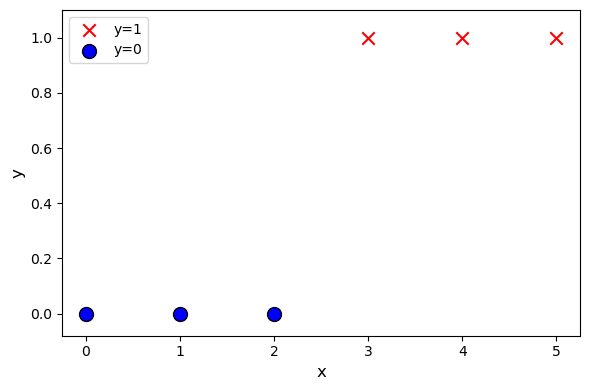

In [4]:
pos = y_train == 1
neg = y_train == 0

plt.figure(figsize=(6, 4))

plt.scatter(x_train[pos], y_train[pos],
            marker='x', s=80, c='red', label="y=1")
plt.scatter(x_train[neg], y_train[neg], marker='o',
            s=100, label="y=0", facecolors='blue', edgecolors='black', linewidth=1)
plt.ylim(-0.08, 1.1)
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### Sigmoid Fxn

$$g(z) = \frac{1}{1+e^{-z}}$$

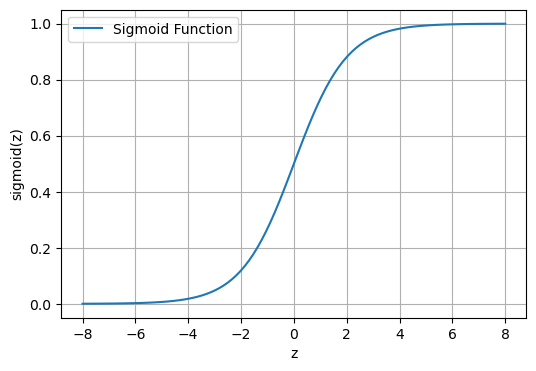

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


z = np.linspace(-8, 8, 100)

sigmoid_values = sigmoid(z)

plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid_values, label='Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.legend()
plt.grid(True)
plt.show()

### Finding Function f_wb

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$ 

In [6]:
def fxn(x, w, b):
    f_wb = sigmoid(np.dot(x, w) + b)
    return f_wb

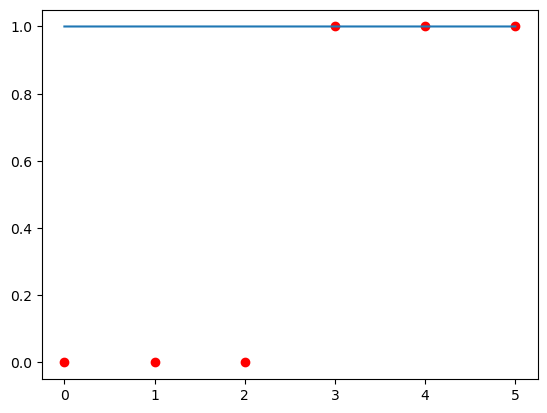

In [7]:
if len(w) == 1:
    fxn1 = fxn(x_train, w, b)

    plt.scatter(x_train, y_train, color="red")
    plt.plot(x_train, fxn1)
    plt.show()

### Decision Boundary


  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1 = 0$$

#### Dataset

In [8]:
x_db = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_db = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)

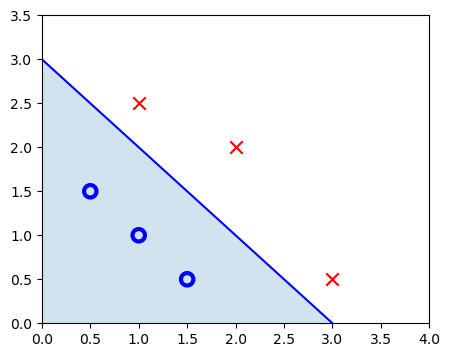

In [9]:
x0 = np.arange(0, 6)

x1 = 3 - x0
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(x0, x1, c="b")
ax.axis([0, 4, 0, 3.5])

ax.fill_between(x0, x1, alpha=0.2)

pos = y_db == 1
neg = y_db == 0
pos = pos.reshape(-1,)
neg = neg.reshape(-1,)

plt.scatter(x_db[neg, 0], x_db[neg, 1], marker='o', s=80,
            label="neg_label", facecolors='none', edgecolors="blue", lw=3)
plt.scatter(x_db[pos, 0], x_db[pos, 1], marker='x',
            s=80, c='red', label="pos_label")
plt.show()
plt.show()

### Loss Fxn
$$
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
$$

 $$= -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [10]:
def loss(x, y, w, b):
    a = fxn(x, w, b)
    epsilon = 1e-15  # Small constant to avoid taking log(0)

    loss = -y * math.log(a + epsilon) - (1 - y) * math.log(1 - a + epsilon)
    return loss

### Cost Fxn
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

In [11]:
def cost_fxn(X, y, w, b):

    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += loss(X[i], y[i], w, b)

    cost = cost / m
    return cost

#### Some Plots

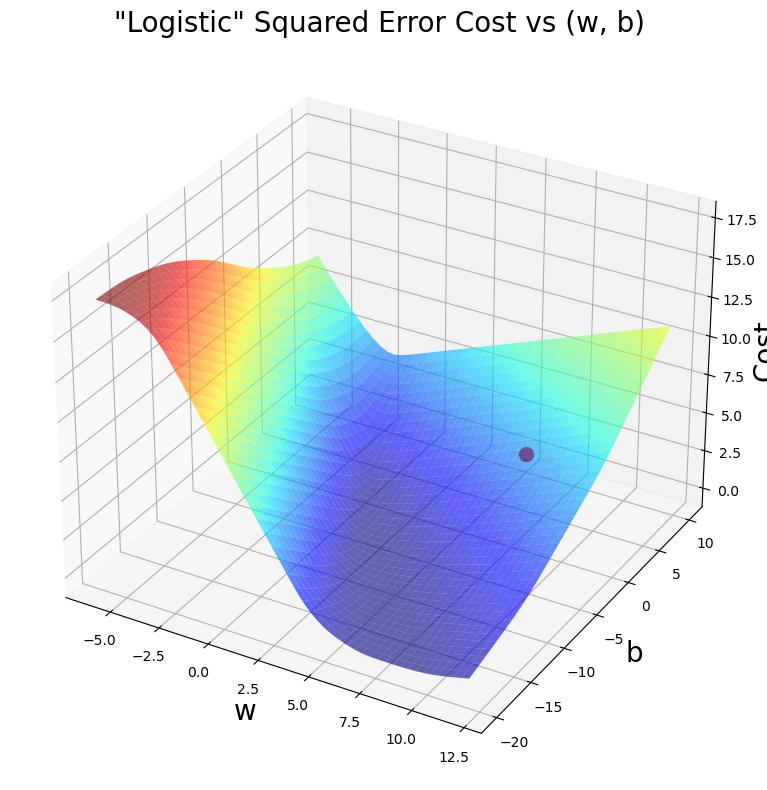

In [12]:
soup_bowl(x_train, y_train, w, b)

### Finding dJ/dw and dJ/db

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$

In [13]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    a = fxn(x, w, b) - y
    dj_dw = (np.dot(a, x)) / m
    dj_db = np.sum(a) / m
    return dj_dw, dj_db

### Gradient Descent

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$


In [14]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    J_history = []
    p_history = []

    for i in range(num_iters+1):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        J_history.append(cost_fxn(x, y, w, b))
        p_history.append([w, b])
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}, w: {w}, b:{b}")

    return w, b, J_history, p_history


iterations = 10000
tmp_alpha = 1.0e-1


w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w, b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")


f_wb = fxn(x_train, w_final, b_final)
print("Cost is", cost_fxn(x_train, y_train, w_final, b_final))

Iteration    0: Cost 7.45e+00, w: [4.95000001], b:9.950000761764102
Iteration 1000: Cost 1.32e-01, w: [1.94357846], b:-4.532187811486597
Iteration 2000: Cost 8.42e-02, w: [2.71585819], b:-6.535471646001672
Iteration 3000: Cost 6.46e-02, w: [3.22521954], b:-7.834466336781398
Iteration 4000: Cost 5.30e-02, w: [3.62055449], b:-8.83606124058392
Iteration 5000: Cost 4.51e-02, w: [3.94791911], b:-9.662597001748475
Iteration 6000: Cost 3.92e-02, w: [4.22882495], b:-10.37034842110977
Iteration 7000: Cost 3.48e-02, w: [4.47546538], b:-10.990900553853033
Iteration 8000: Cost 3.12e-02, w: [4.69557844], b:-11.544161480692926
Iteration 9000: Cost 2.83e-02, w: [4.89444965], b:-12.043663029887693
Iteration 10000: Cost 2.59e-02, w: [5.07588043], b:-12.499101969930441
(w,b) found by gradient descent: ([5.07588043],-12.499101969930441)
Cost is 0.025934093960807036


#### Some Plots

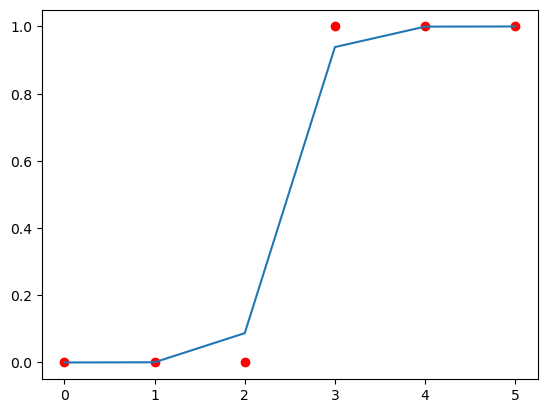

In [15]:
if len(w) == 1:
    fxn2 = fxn(x_train, w_final, b_final)

    plt.scatter(x_train, y_train, color="red")
    plt.plot(x_train, fxn2)
    plt.show()

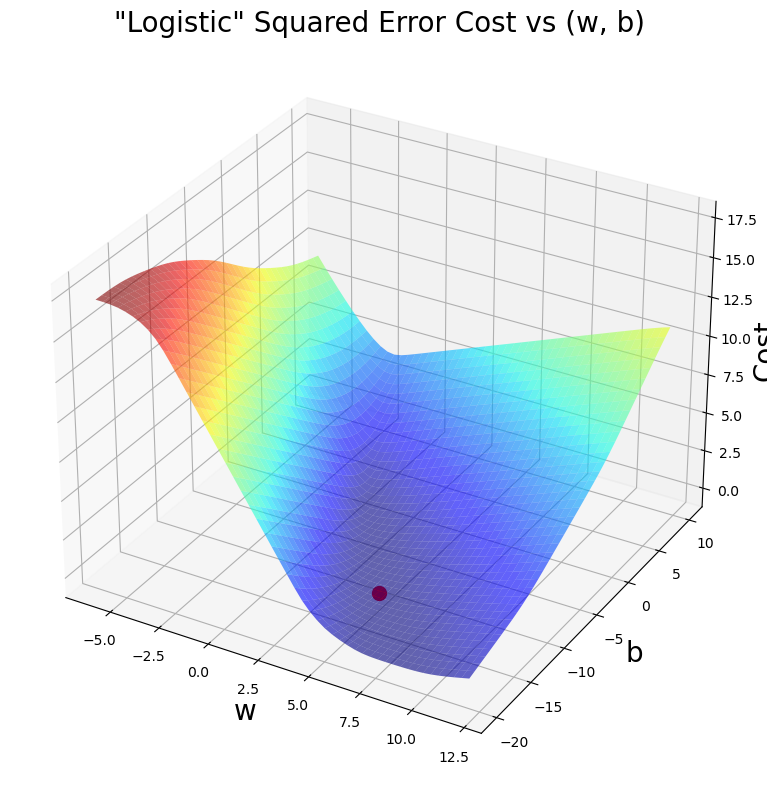

In [16]:
soup_bowl(x_train, y_train, w_final, b_final)

### Regularized Linear Regression


#### Finding Cost Fxn

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $$ 

In [17]:
def cost_fxn_regularized(X, y, w, b, lambda_ = 1):
    cost=cost_fxn(X, y, w, b)
    cost += np.sum(w ** 2)
    return cost

#### Finding dJ/dw and dJ/db

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$


In [18]:
def compute_gradient_regularized(X, y, w, b, lambda_):
    m = X.shape[0]
    dj_dw, dj_db = compute_gradient(X, y, w, b)

    dj_dw += (lambda_ / m) * w

    return dj_db, dj_dw